![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning.

### Linear Regression

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy

In [2]:
df['district'].value_counts()

,count
district,
Чиланзарский,1616
Мирзо-Улугбекский,1342
Учтепинский,872
Юнусабадский,847
Мирабадский,717
Яккасарайский,628
Яшнободский,456
Шайхантахурский,356
Олмазорский,262


**Darsimiz uchun Chilonzor tumanidagi uylarning narxini bashorat qilib ko'ramiz**

In [10]:
housing = df[df.district=='Мирзо-Улугбекский']
housing.head()

,district,rooms,size,level,max_levels,price
18,Мирзо-Улугбекский,3,65.0,1,4,32500.0
24,Мирзо-Улугбекский,3,69.0,1,4,49900.0
73,Мирзо-Улугбекский,3,95.0,5,5,50000.0
76,Мирзо-Улугбекский,3,65.0,4,5,41500.0
114,Мирзо-Улугбекский,2,72.0,18,19,55000.0


In [11]:
X = housing['size'].to_numpy()
X

array([65., 69., 95., ..., 50., 85., 18.])

In [12]:
y = housing['price'].to_numpy()
y

array([32500., 49900., 50000., ..., 28000., 90000., 11000.])

**Narx va uy maydoni o'rtasida chiziqli bog'liqlik bor ekanini tekshirib ko'ramiz.**

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

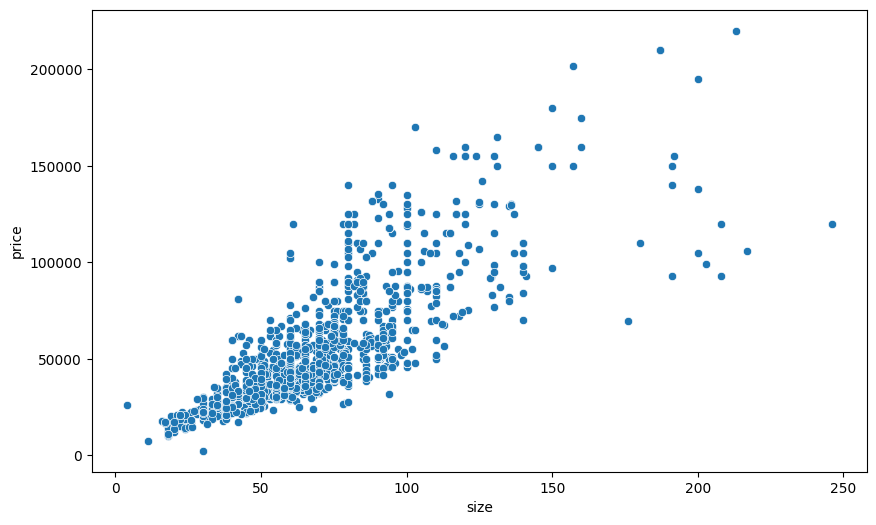

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

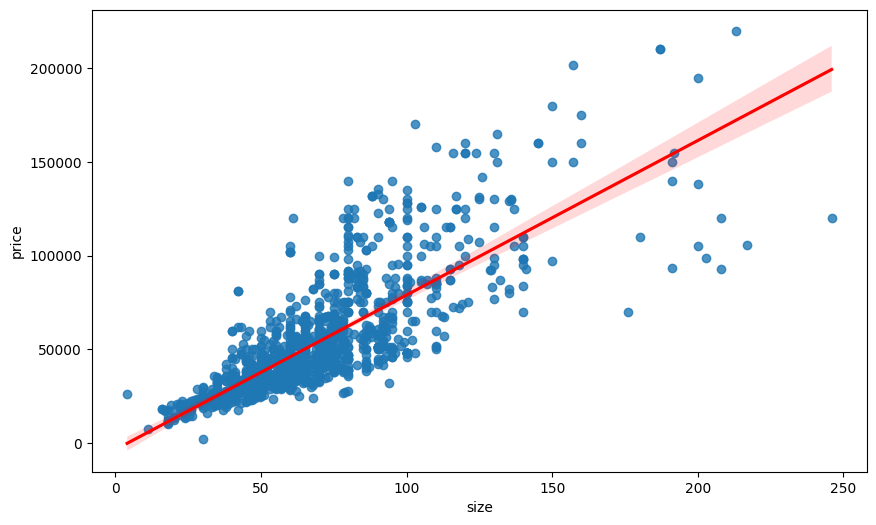

In [15]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

## 1-Vazifa
Sizning vazifangiz yuqoridagi `X` va `y` o'zgaruvchilardan quyidagi formuladan foydalangan xolda $\theta_0$ va $\theta_1$ koeffisientlarni hisoblash.

![Imgur](https://i.imgur.com/zZoXZxI.png)

Bu yerda $\tilde{x}$ - `X` ustun uchun o'rtracha qiymat,  $\tilde{y}$ - `y` ustun uchun o'rtracha qiymat

In [16]:
import numpy as np

Xmean = np.mean(X)
ymean = np.mean(y)

In [17]:
theta1 = sum((X-Xmean)*(y-ymean))/sum((X-Xmean)**2)
print(f"{theta1=}")

theta1=np.float64(824.4125771631817)


In [18]:
theta0 = ymean - theta1*Xmean
print(f"{theta0=}")

theta0=np.float64(-3476.7848437808498)


## 2-Vazifa
`X` dan bir nechta tasodifiy qiymatlarni ajratib oling va ularga mos keluvchi `y` ni yuqoridagi koeffisientlar yordamida hisoblab ko'ring.

![Imgur](https://i.imgur.com/iT5tffj.png)

In [19]:
x_test = housing.sample(10, random_state=42)['size'].to_numpy()
print(f"{x_test=}")
y_test = housing.sample(10, random_state=42)['price'].to_numpy()
print(f"{y_test=}")

x_test=array([ 70.,  50., 200.,  19.,  90.,  60.,  65.,  60., 110.,  80.])
y_test=array([ 66000.,  35000., 195000.,  20500.,  51000.,  63000.,  63000.,
        36000.,  78800.,  75000.])


In [20]:
y_predict = theta0 + theta1*x_test
print(f"{y_predict=}")

y_predict=array([ 54232.09555764,  37743.84401438, 161405.73058886,  12187.05412232,
        70720.34710091,  45987.96978601,  50110.03267183,  45987.96978601,
        87208.59864417,  62476.22132927])


## 3-Vazifa

Hisoblangan va asl qiymtlar o'rtasidagi RMSE (root mean square error), MAE (mean absolute error) hisoblang.

![Imgur](https://i.imgur.com/GJH9CGy.png)

![Imgur](https://i.imgur.com/aXL9iWa.png)

In [21]:
# MAE
MAE = np.sum(np.absolute(y_predict-y_test))/len(y_test)
print(f"{MAE=}")

MAE=np.float64(13696.165548953626)


In [22]:
# RMSE
RMSE = np.sqrt(np.sum((y_predict-y_test)**2)/len(y_test))
print(f"{RMSE=}")

RMSE=np.float64(15860.182485315609)


# Scikit-learn yordamida LR
Keling endi yuqoridagi amallarni scikit-learn yordamida bajaramiz.

Avvalo ma'lumotlarni train va testga bo'lib olamiz.

In [23]:
housing.shape

(1342, 6)

Bizda ma'lumotlar kam, shuning uchun 10% test uchun olamiz

In [24]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.10, random_state=42)

Linear Regression ML

In [25]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

# Modelni tarbiyalaymiz (train)
LR_model.fit(x_train, y_train)

#theta1 va theta0 koeefisentlarni ajratib olamiz
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print (f'{theta1=}')
print (f'{theta0=}')

theta1=np.float64(819.4444644768205)
theta0=np.float64(-3203.043697357578)


$\theta_0$ va $\theta_1$ qiymatlari yordamida to'g'ri chiziq chizamiz

Text(0, 0.5, 'Price')

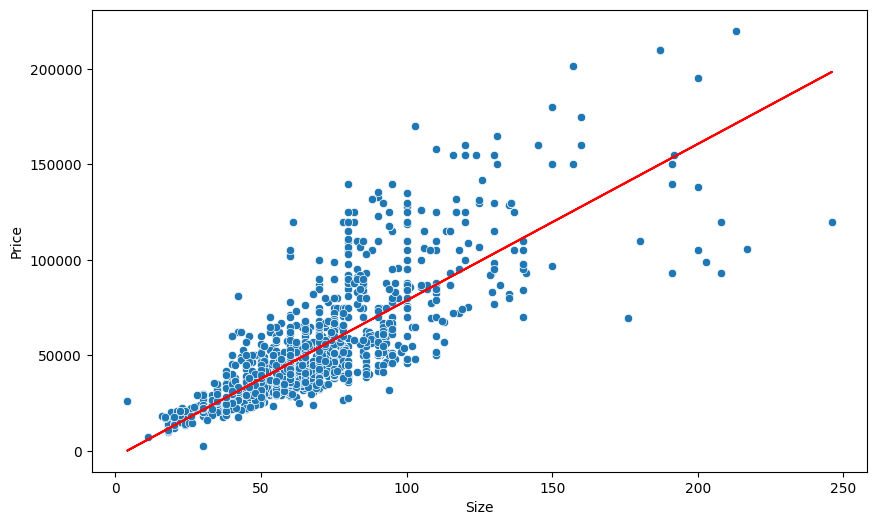

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("Size")
plt.ylabel("Price")

### Modelni baholaymiz

In [27]:
x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])

In [28]:
y_predict = LR_model.predict(x_test)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
R2 = r2_score(y_test, y_predict)

print(f"{MAE=}")
print(f"{RMSE=}")
print(f"{R2=}")

MAE=13198.551007001506
RMSE=np.float64(19425.354976073108)
R2=0.5969746878665245
